## 本利和公式
### 觀念: https://wiki.mbalib.com/zh-tw/%E5%A4%8D%E5%88%A9

In [1]:
capital = 100 ## 本金
r = 0.05 ## 投資年限
T = 1 ## 期數
total = capital * (1 + r) ** T
print(total)

105.0


## 蒙地卡羅估價演算法
### 理論: https://zh.wikipedia.org/wiki/%E8%92%99%E5%9C%B0%E5%8D%A1%E7%BE%85%E6%96%B9%E6%B3%95
### 金融中的用法: https://mail.tku.edu.tw/wlin/load/Monte_Carlo.pdf

用途:計算股票合理價格

In [10]:
import math
import numpy as np

S0 = 100 # 初始股價
K = 105 # 歐式買權履約價
T = 1.0 # 到期日所剩時間
r = 0.05 # 無風險利率
sigma = 0.2 # 波動率

I = 100000 # 模擬蒙地卡羅幾次
np.random.seed(1000) # 初始化偽隨機變數
z = np.random.standard_normal(I) # 抽取標準常態分佈隨機亂數
print(z)

ST = S0 * np.exp((r - sigma ** 2 / 2) *Ｔ + sigma * math.sqrt(T) * z) # 求算到期日股價
print(ST)

hT = np.maximum(ST - K, 0) # 求算到期日選擇權內含價值
print(hT)

C0 = math.exp(-r * T) * np.mean(hT) # 求算蒙地卡羅估計直
print('Value of the European call options = {:5.6f}.'.format(C0))

[-0.8044583   0.32093155 -0.02548288 ...  2.05563421 -0.31621237
 -0.19326188]
[ 87.73128167 109.8764437  102.52161044 ... 155.44578614  96.73039856
  99.13849486]
[ 0.          4.8764437   0.         ... 50.44578614  0.
  0.        ]
Value of the European call options = 8.019103.


## 課堂實作

### 針對標普500指數架構的資料，分析過往幾年的歷史指數價格，觀察指數的波動率是如何跟著時間波動的，並希望能夠證明波動率跟著時間變動而波動，而不是像一些典型的模型所假設的波動率為不變的常數

In [15]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

## 視覺化的設定
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [16]:
## 導入數據集
df = pd.read_csv('tr_eikon_eod_data.csv')
df

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2212,2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2213,2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2214,2018-06-28,185.500000,98.630,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22


In [18]:
## 拿出'.SPX'數據，並組成DataFrame
data = pd.DataFrame(df['.SPX'])
data

,.SPX
0,NaN
1,1132.99
2,1136.52
3,1137.14
4,1141.69
...,...
2211,2717.07
2212,2723.06
2213,2699.63
2214,2716.31


In [26]:
## 將缺失值移除掉
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 1 to 2215
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [27]:
## shift 將數據向下移動一位
data.shift(1)

,.SPX
1,NaN
2,1132.99
3,1136.52
4,1137.14
5,1141.69
...,...
2211,2754.88
2212,2717.07
2213,2723.06
2214,2699.63


In [30]:
## 用向量化方式進行Log運算，所計算出的值
data['rets'] = np.log(data / data.shift(1)) ## shift 將數據向下移動一位
data

,.SPX,rets
1,1132.99,NaN
2,1136.52,0.003111
3,1137.14,0.000545
4,1141.69,0.003993
5,1144.98,0.002878
...,...,...
2211,2717.07,-0.013820
2212,2723.06,0.002202
2213,2699.63,-0.008642
2214,2716.31,0.006160


In [31]:
## 計算推導出滾動的年化波動率
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
data

,.SPX,rets,vola
1,1132.99,NaN,NaN
2,1136.52,0.003111,NaN
3,1137.14,0.000545,NaN
4,1141.69,0.003993,NaN
5,1144.98,0.002878,NaN
...,...,...,...
2211,2717.07,-0.013820,0.125021
2212,2723.06,0.002202,0.125034
2213,2699.63,-0.008642,0.125072
2214,2716.31,0.006160,0.124924


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

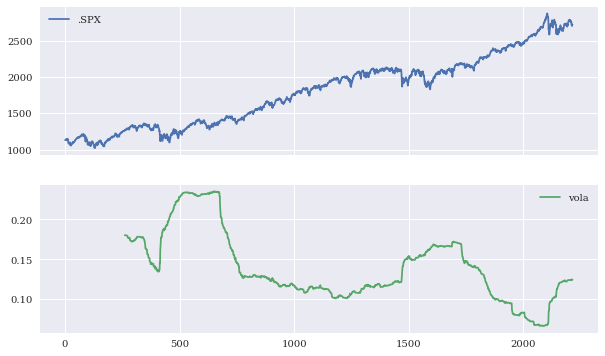

In [32]:
## 視覺化 - 指數價格、波動率
data[['.SPX', 'vola']].plot(subplots = True, figsize = (10, 6))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 1 to 2215
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB
None


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

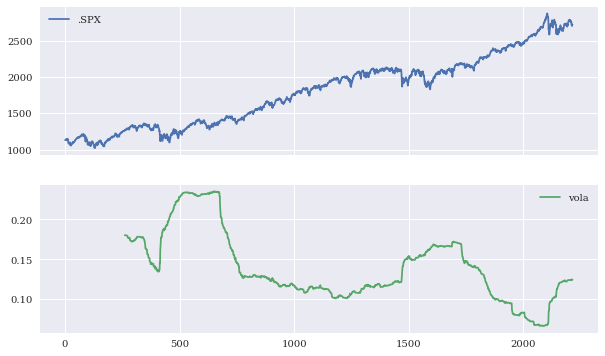

In [35]:
## 完整程式碼
import numpy as np
import pandas as pd
from pylab import plt, mpl

## 視覺化的設定
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## 導入數據集
df = pd.read_csv('tr_eikon_eod_data.csv')

## 拿出'.SPX'數據，並組成DataFrame
data = pd.DataFrame(df['.SPX'])

## 將缺失值移除掉
data.dropna(inplace = True)
print(data.info())

## 用向量化方式進行Log運算，所計算出的值
data['rets'] = np.log(data / data.shift(1)) ## shift 將數據向下移動一位

## 計算推導出滾動的年化波動率
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

## 視覺化 - 指數價格、波動率
data[['.SPX', 'vola']].plot(subplots = True, figsize = (10, 6))
